In [ ]:
# Import libraries
import os
import numpy as np
import cv2
import tensorflow as tf
from zipfile import ZipFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Unzip dataset
data_path = '/content/archive (16).zip'
with ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall()
    print('The dataset has been extracted.')

The dataset has been extracted.


In [ ]:
# Image settings
IMG_SIZE = 256
BATCH_SIZE = 32
DATASET_PATH = '/content/PlantVillage'

In [ ]:
# Image data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 14594 images belonging to 13 classes.
Found 3643 images belonging to 13 classes.


In [ ]:
# Get class names
classes = list(train_generator.class_indices.keys())
print("Classes:", classes)

Classes: ['Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [ ]:
# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,653 (56.61 MB)

 Trainable params: 14,840,653 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 49s 89ms/step - accuracy: 0.3892 - loss: 1.9601 - val_accuracy: 0.7788 - val_loss: 0.6524
Epoch 2/10
  1/456 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - accuracy: 0.8750 - loss: 0.5095

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


456/456 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8750 - loss: 0.5095 - val_accuracy: 0.7757 - val_loss: 0.6530
Epoch 3/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 37s 80ms/step - accuracy: 0.7302 - loss: 0.8290 - val_accuracy: 0.8579 - val_loss: 0.4225
Epoch 4/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8125 - loss: 0.5728 - val_accuracy: 0.8617 - val_loss: 0.4128
Epoch 5/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.8099 - loss: 0.5661 - val_accuracy: 0.8816 - val_loss: 0.3642
Epoch 6/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7812 - loss: 0.6436 - val_accuracy: 0.8850 - val_loss: 0.3579
Epoch 7/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 35s 77ms/step - accuracy: 0.8495 - loss: 0.4625 - val_accuracy: 0.8675 - val_loss: 0.3972
Epoch 8/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9062 - loss: 0.3142 - val_accuracy: 0.8592 - val_loss: 0.4205
Epoch 9/10
456/456 ━━━━━━━━━━━━━━━━━━━━ 36s 78ms/step - accuracy: 0.8623 - loss: 0.4196 - val_accuracy: 0

In [ ]:
# Save the model
model.save('plant_disease_model.h5')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
# Evaluate performance
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(val_generator)
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

457/457 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9303 - loss: 0.2402
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8718 - loss: 0.4067
Training Accuracy: 92.93%
Validation Accuracy: 88.55%


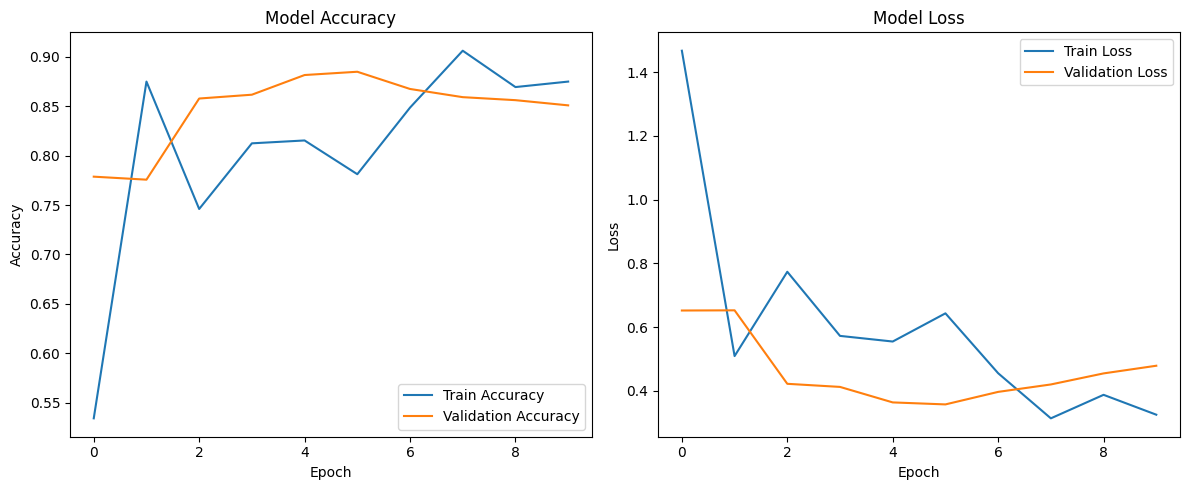

In [ ]:
# Plot training metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Load model for testing
model = tf.keras.models.load_model('plant_disease_model.h5')

In [ ]:
# Test image prediction
image_path = "/content/download.jpeg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
img = img / 255.0
img = np.expand_dims(img, axis=0)

In [ ]:
# Predict
prediction = model.predict(img)
predicted_class_index = np.argmax(prediction)
print("Predicted class:", classes[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: Tomato_Septoria_leaf_spot


In [ ]:
# Download model (after saving!)
from google.colab import files
files.download('plant_disease_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example arrays (replace with your actual predictions and labels)
y_true = [0, 1, 2, 2, 1, 0]       # True labels
y_pred = [0, 1, 2, 2, 0, 0]       # Predicted labels

# Calculate metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Precision: 88.89%
Recall: 83.33%
F1-Score: 82.22%


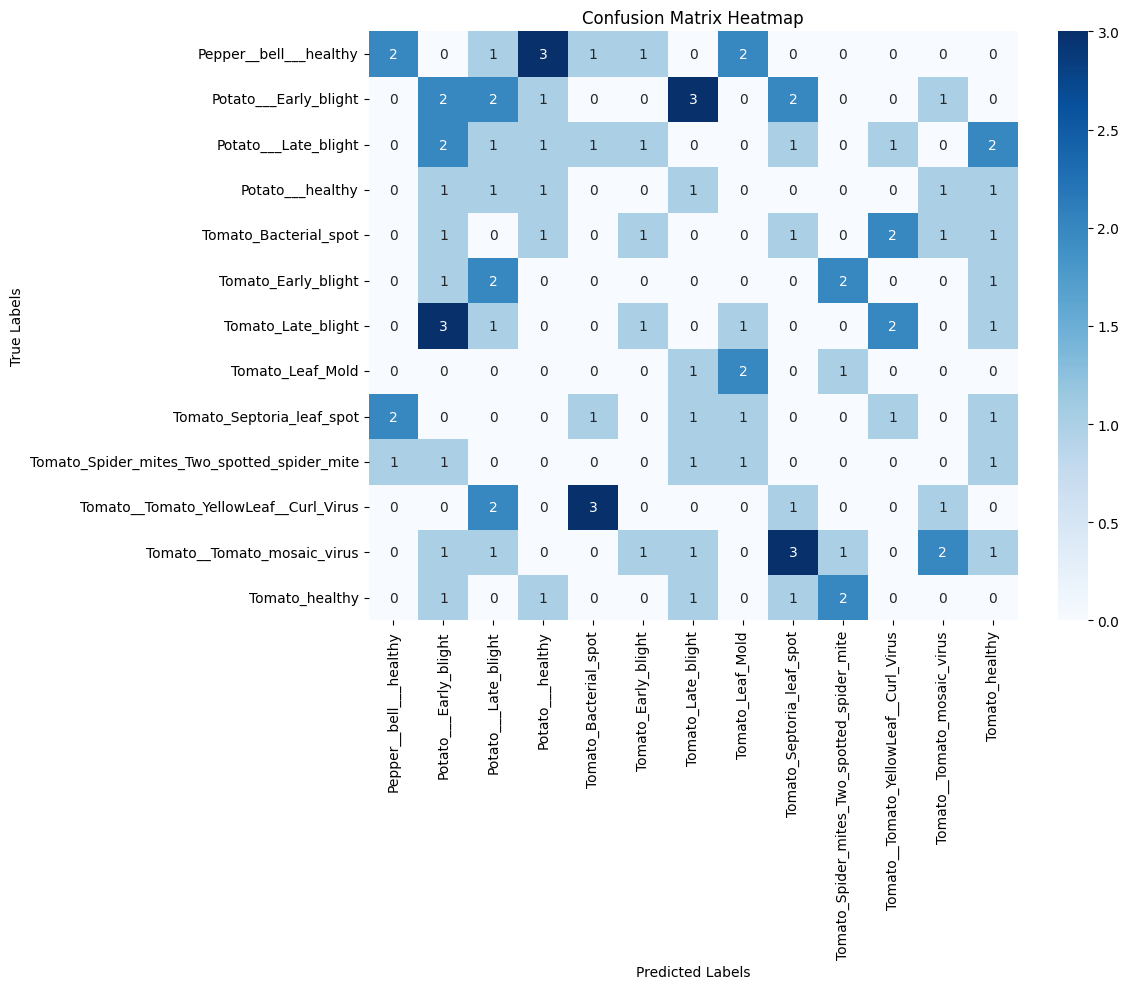

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Simulated data for demonstration – replace with your actual model outputs
# These values should match your model predictions and true labels
y_true = np.random.randint(0, 13, 100)
y_pred = np.random.randint(0, 13, 100)

class_names = [
    'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
    'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
    'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite',
    'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus',
    'Tomato_healthy'
]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
